In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
import tensorflow as tf
print('Tensorflow version', tf.__version__)
from functools import partial

from include import decoder
from include import fit
from include import helpers

from matplotlib import pyplot as plt

Tensorflow version 1.12.0


# Concise representations with the deep decoder
We demonstrate the the deep decoder enables concise representations of images. Towards this goal, we represent an image with an underparametrized deep decoder with $N$ parameters, and for comparison with a wavelet respresentation that retains the $N$ largest wavelet coefficients (i.e., wavelet thresholding).

We find that if $N$ is small relative to the number of output pixels, the deep decoder performs better (i.e., has smaller representation error).

In [15]:
def rep_error_deep_decoder(img, k=128, convert2ycbcr=False):
    '''
    mse obtained by representing img_np with the deep decoder
    ''' 
    num_channels = [k]*5
    net_fn = partial(decoder.decodernw,
                     num_output_channels=img.shape[-1], 
                     num_channels_up=num_channels)
    rnd = 500
    numit = 20000
    rn = 0.005
    _, _, _, out_img, nparms = fit.fit(num_channels=num_channels,
                                       reg_noise_std=rn,
                                       reg_noise_decayevery=rnd,
                                       num_iter=numit,
                                       LR=0.005,
                                       img_noisy=img[None, :, :, :],
                                       net=net_fn,
                                       img_clean=img[None, :, :, :],
                                       find_best=True,
                                       verbose=True)
    out_img = out_img[0]
    return helpers.psnr(out_img, img), out_img, nparms
        
def plot_imgs(img, k):
    # compute representations
    psnrv, out_img, nparms = rep_error_deep_decoder(img, k=k)
    nchannels = img.shape[0]    
    print("Number of parameters:", nparms)
    print("Compression factor:", np.prod(img.shape) / nparms)
    # plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
    
    if img.shape[-1] == 3:
        ax1.imshow(img)
    else:
        ax1.imshow(img[..., 0], cmap='gray')
    ax1.set_title('Original image')
    ax1.axis('off')
    
    if out_img.shape[-1] == 3:
        ax2.imshow(out_img)
    else:
        ax2.imshow(out_img[..., 0], cmap='gray')
    ax2.set_title( "Deep-Decoder representation, PSNR: %.2f" % psnrv )
    ax2.axis('off')
    plt.show()

# Color Image

In [3]:
img = helpers.load_img('test_data/', 'sf4_rgb')

shape:  [1, 16, 16, 64]
optimize with adam 0.005
Save net in log/01-16_00-02
Final graph size: 3.19 MB
[Iteration 19990] loss=0.00404  true loss=0.00404  true loss orig=0.00404  noise energy=0.00000
Best MSE (wrt noisy) 0.0038874913
MSE (wrt true) 0.0038874913
Number of parameters: 25536
Compression factor: 30.796992481203006


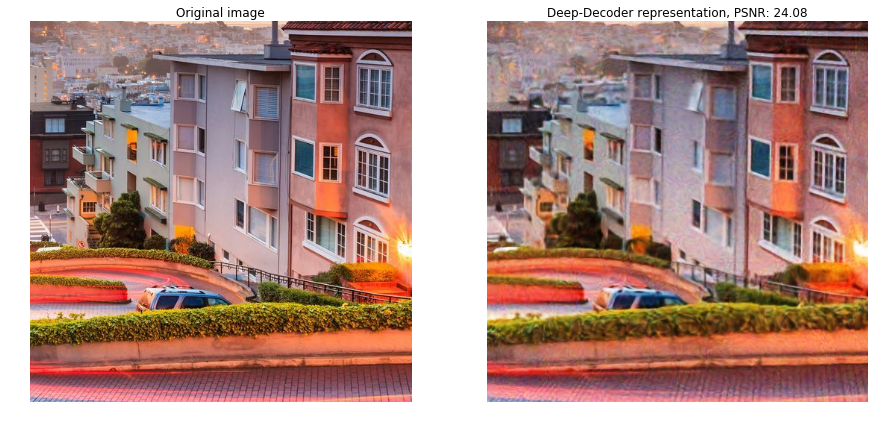

In [4]:
plot_imgs(img, 64)

shape:  [1, 16, 16, 128]
optimize with adam 0.005
Save net in log/01-16_00-16
Final graph size: 3.19 MB
[Iteration 19990] loss=0.00213  true loss=0.00213  true loss orig=0.00213  noise energy=0.00000
Best MSE (wrt noisy) 0.001782563
MSE (wrt true) 0.001782563
Number of parameters: 100224
Compression factor: 7.846743295019157


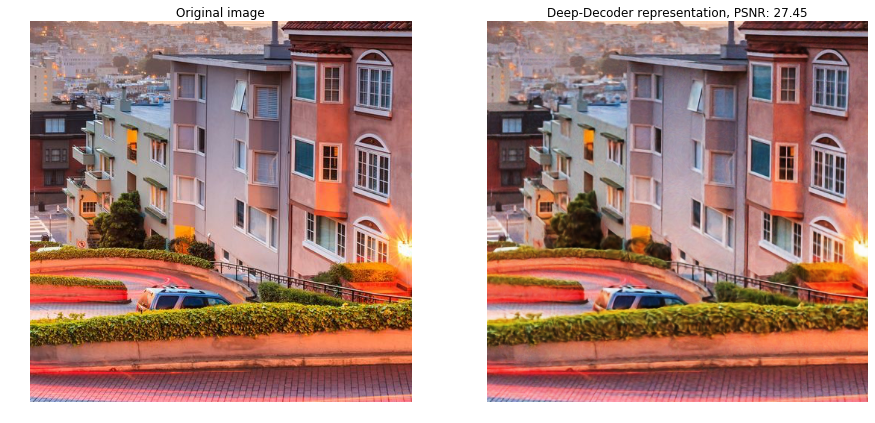

In [5]:
plot_imgs(img, 128)

# Gray Image

In [6]:
img = helpers.load_img('test_data/', 'mri')

shape:  [1, 16, 16, 32]
optimize with adam 0.005
Save net in log/01-16_03-57
Final graph size: 1.09 MB
[Iteration 19990] loss=0.00135  true loss=0.00135  true loss orig=0.00135  noise energy=0.00000
Best MSE (wrt noisy) 0.0012871823
MSE (wrt true) 0.0012871823
Number of parameters: 6560
Compression factor: 39.9609756097561


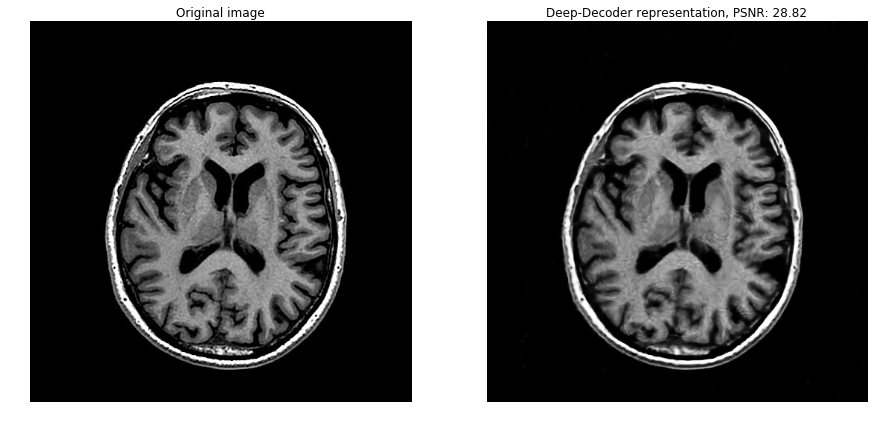

In [16]:
plot_imgs(img, 32)

shape:  [1, 16, 16, 64]
optimize with adam 0.005
Save net in log/01-16_04-07
Final graph size: 1.09 MB
[Iteration 19990] loss=0.00036  true loss=0.00036  true loss orig=0.00036  noise energy=0.00000
Best MSE (wrt noisy) 0.000313866
MSE (wrt true) 0.000313866
Number of parameters: 25408
Compression factor: 10.317380352644836


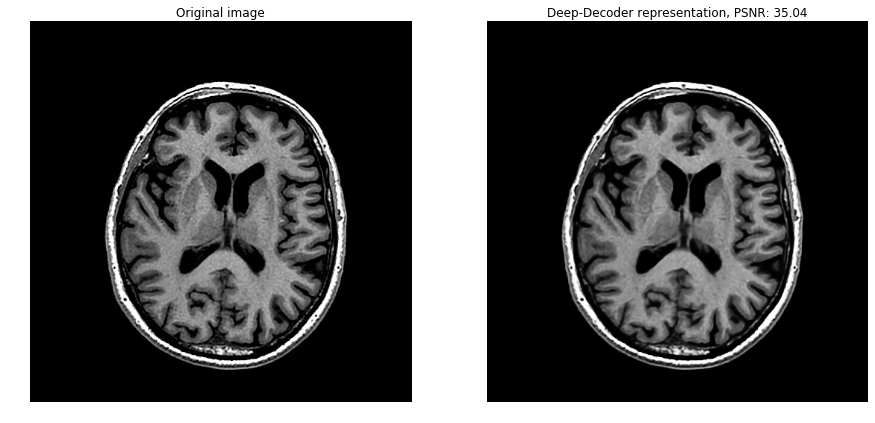

In [17]:
plot_imgs(img, 64)